### 2.1.1. Sampling and Mass Data Processing

This code:
- Loads and filters mass data from a CSV file.
- Saves the filtered mass data as `one_{number_of_samples}_mass.npz`.
- Uses existing combined mass and split files.
- Extracts unique item names for training/validation sets.
- Samples items based on mass values, selecting 10 items evenly spread across the mass range.
- Saves the sampled training and validation mass data to `one_{number_of_samples}_sampled10_split_{split_text}_train_valid.npz`.


In [1]:
import numpy as np
import pandas as pd
import os

# Parameters
number_of_samples = 3000
split_text = 'random'

# File paths
csv_file_path = '../data/bracket_labels.csv'
one_mass_path = f'../data/npy/one_{number_of_samples}_mass.npz'
sample_output_file = f'../data/npy/one_{number_of_samples}_sampled10_split_{split_text}_train_valid.npz'

# The following files are assumed to already exist
combined_mass_path = f'../data/npy/combined_{number_of_samples}_mass.npz'
split_output_file = f'../data/npy/combined_{number_of_samples}_split_{split_text}_train_valid.npz'

# Directory for figures
base_figures = '../figures/'
os.makedirs(base_figures, exist_ok=True)

# List of items to exclude
union_list = [
    '102_240', '138_14', '149_256', '20_476', '200_610', '208_139', '225_120', '247_440', '249_321', '25_234', 
    '280_556', '285_628', '293_424', '322_257', '348_556', '377_14', '377_82', '416_78', '421_466', '474_564', 
    '486_507', '497_153', '506_25', '506_533', '527_8', '533_16', '536_282', '560_454', '56_324', '570_548', 
    '623_129', '625_289', '72_209'
]

########################################
# 1. Create one_{number_of_samples}_mass.npz
########################################

# Load CSV data and filter
df = pd.read_csv(csv_file_path, usecols=["item_name", "mass(kg)"])
df_filtered = df[~df["item_name"].isin(union_list)]
one_mass_data = dict(zip(df_filtered["item_name"], df_filtered["mass(kg)"]))
sorted_one_mass_data = dict(sorted(one_mass_data.items()))

# Save one_mass_data as npz
np.savez(one_mass_path, **sorted_one_mass_data)
print(f"Saved {one_mass_path}")

########################################
# 2. Create one_{number_of_samples}_sampled10_split_{split_text}_train_valid.npz
# Assumes that combined_{number_of_samples}_mass.npz and
# combined_{number_of_samples}_split_{split_text}_train_valid.npz already exist
########################################

# Load one_mass_data
loaded_one_mass = np.load(one_mass_path)
one_mass_data = {key: loaded_one_mass[key].item() for key in loaded_one_mass.files}

# Load combined mass data
loaded_combined = np.load(combined_mass_path)
combined_mass_data = {key: loaded_combined[key].item() for key in loaded_combined.files}

# Load train/valid split information
loaded_split = np.load(split_output_file)
combined_train_keys = loaded_split['train']
combined_valid_keys = loaded_split['valid']

def extract_unique_item_names(prefixed_keys):
    # Extract unique item names by removing the prefix (e.g., ver_, hor_, dia_)
    item_names = [key.split('_', 1)[1] for key in prefixed_keys]
    return list(set(item_names))

train_item_names = extract_unique_item_names(combined_train_keys)
valid_item_names = extract_unique_item_names(combined_valid_keys)

def sample_keys_by_mass(item_names, mass_dict):
    # Sample items evenly across the mass range by selecting items closest to evenly spaced mass values
    masses = np.array([mass_dict[k] for k in item_names])
    min_mass, max_mass = np.min(masses), np.max(masses)
    sampled_masses = np.linspace(min_mass, max_mass, 10)
    sampled_keys = []
    for m in sampled_masses:
        closest_key = min(item_names, key=lambda k: abs(mass_dict[k] - m))
        sampled_keys.append(closest_key)
    return sampled_keys

# Sample keys from train and valid sets
train_sample_keys = sample_keys_by_mass(train_item_names, one_mass_data)
valid_sample_keys = sample_keys_by_mass(valid_item_names, one_mass_data)

# Prepare sampled data for saving
train_sample = {key: one_mass_data[key] for key in train_sample_keys}
valid_sample = {key: one_mass_data[key] for key in valid_sample_keys}

# Save the sampled train and valid mass data
np.savez(sample_output_file, train=train_sample, valid=valid_sample)
print(f"Saved {sample_output_file}")


Saved ../data/npy/one_3000_mass.npz
Saved ../data/npy/one_3000_sampled10_split_random_train_valid.npz


### 2.1.2. Visualizing Stress and Components in VTK Meshes

This code:
- Loads and processes stress data, mass data, and previously defined train/valid splits.
- Uses PyVista to visualize VTK meshes, applying stress or displacement data as point scalars.
- Organizes plots into rows (train vs. validation) and columns (individual samples).
- Applies direction- and component-specific clipping values to ensure consistent color mapping.
- Generates global colorbars and saves them as reference images.
- Iterates over different directions (`ver`, `hor`, `dia`) and components (`ux`, `uy`, `uz`, `stress`) to produce visualizations for both training and validation samples.


Visualizing UX in VER Direction...
VER - UX - Global Min: -0.2510940134525299, Global Max: 1.3826349973678589


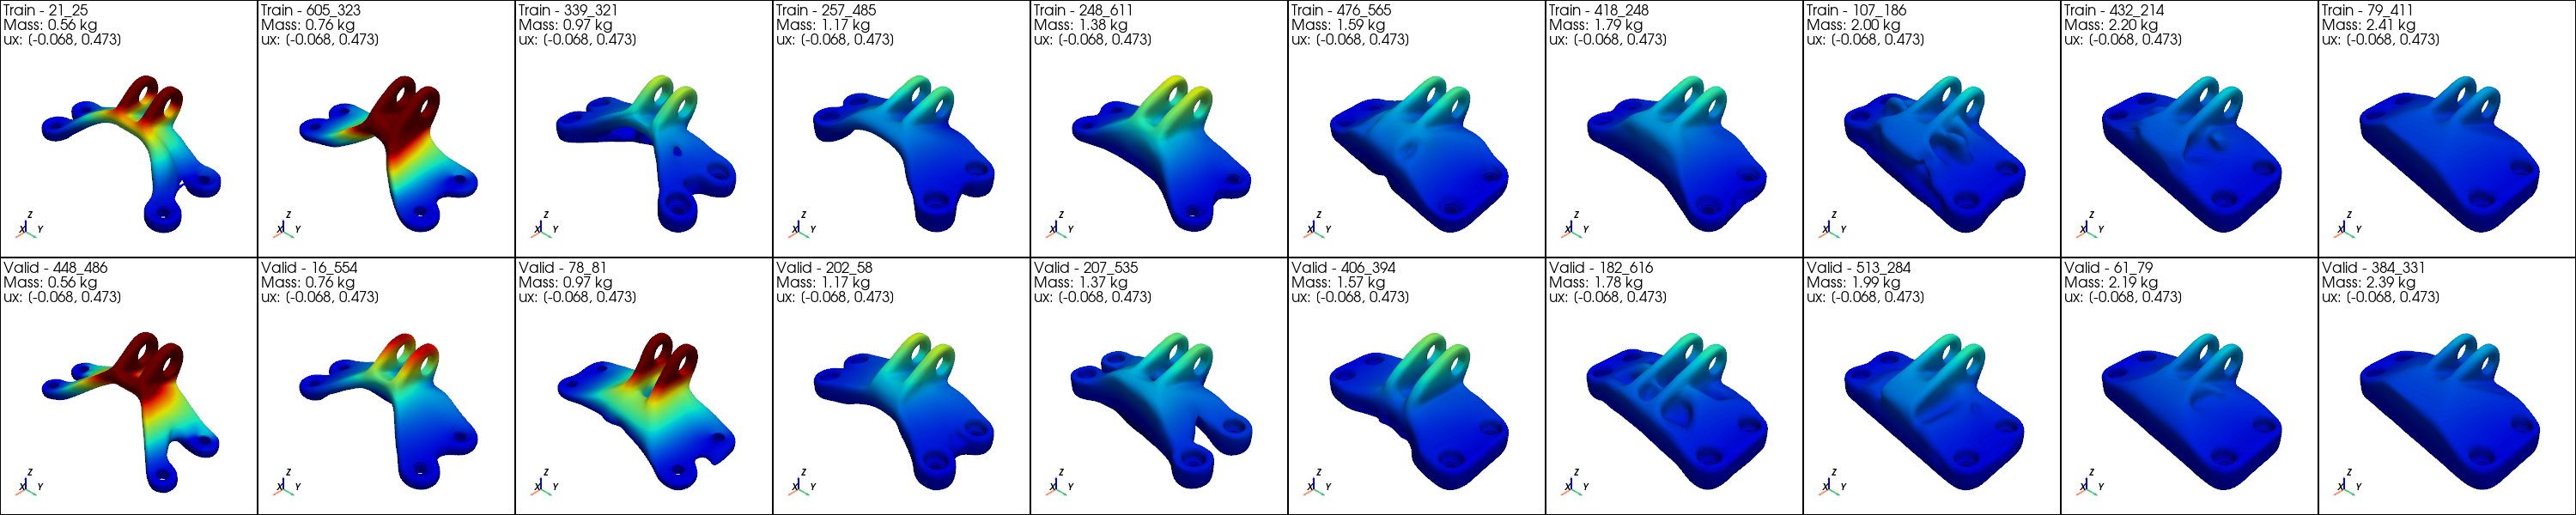

Visualization saved to '../figures/stress_vtk_ver_ux.png'.
Colorbar saved as '../figures/colorbar_ver_ux.png'.


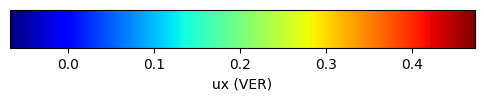

Visualizing UY in VER Direction...
VER - UY - Global Min: -0.2603360116481781, Global Max: 0.18747000396251678


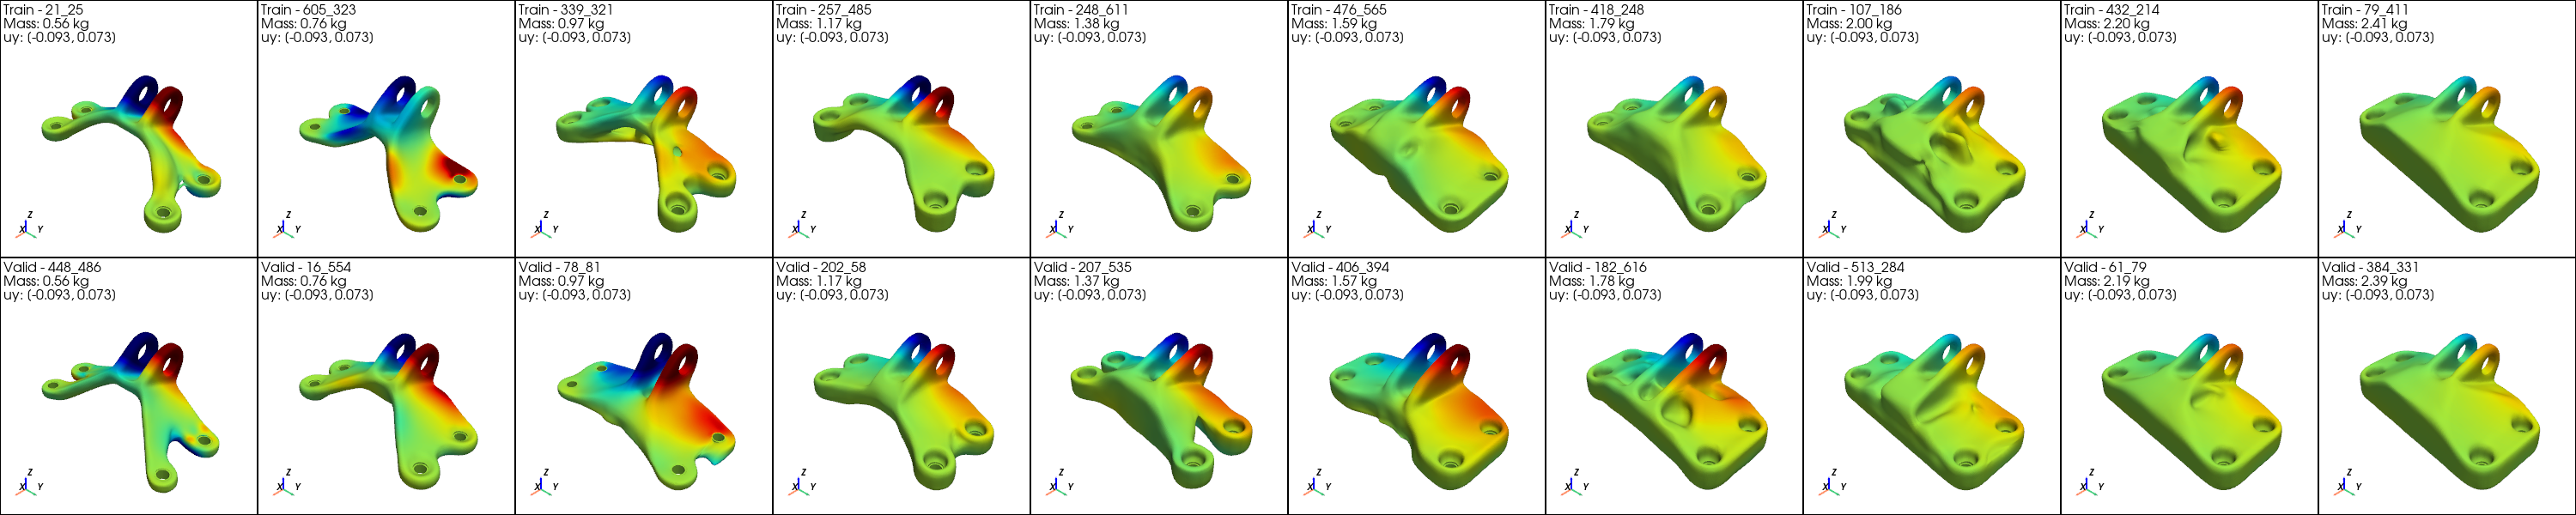

Visualization saved to '../figures/stress_vtk_ver_uy.png'.
Colorbar saved as '../figures/colorbar_ver_uy.png'.


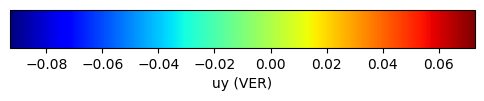

Visualizing UZ in VER Direction...
VER - UZ - Global Min: -0.06947699934244156, Global Max: 1.905148983001709


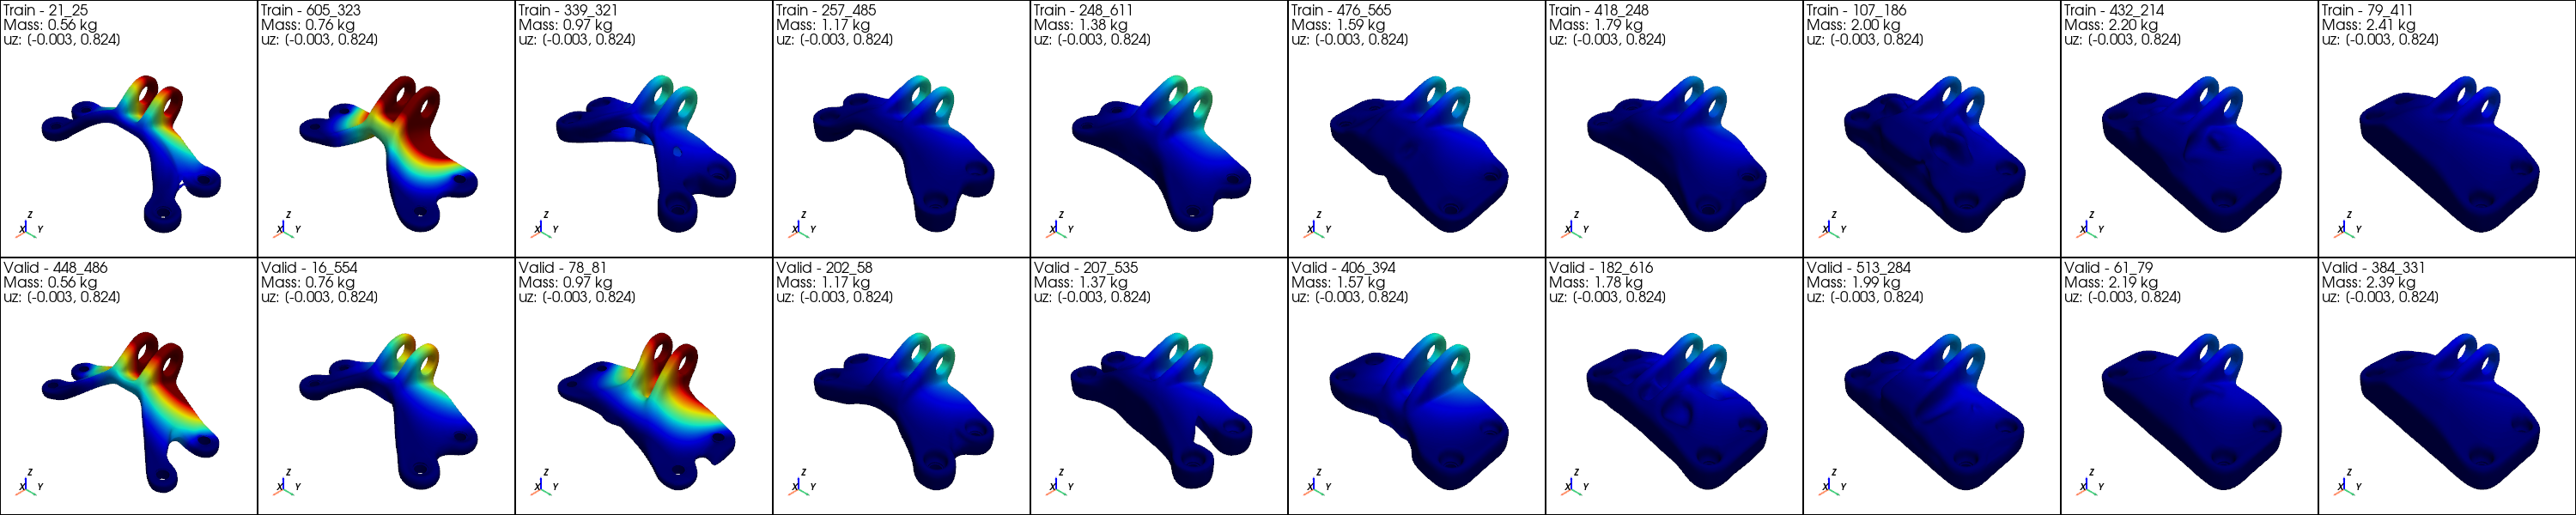

Visualization saved to '../figures/stress_vtk_ver_uz.png'.
Colorbar saved as '../figures/colorbar_ver_uz.png'.


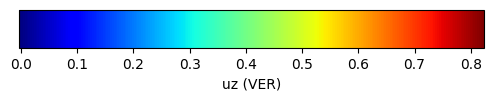

Visualizing STRESS in VER Direction...
VER - STRESS - Global Min: 0.06792999804019928, Global Max: 411.056884765625


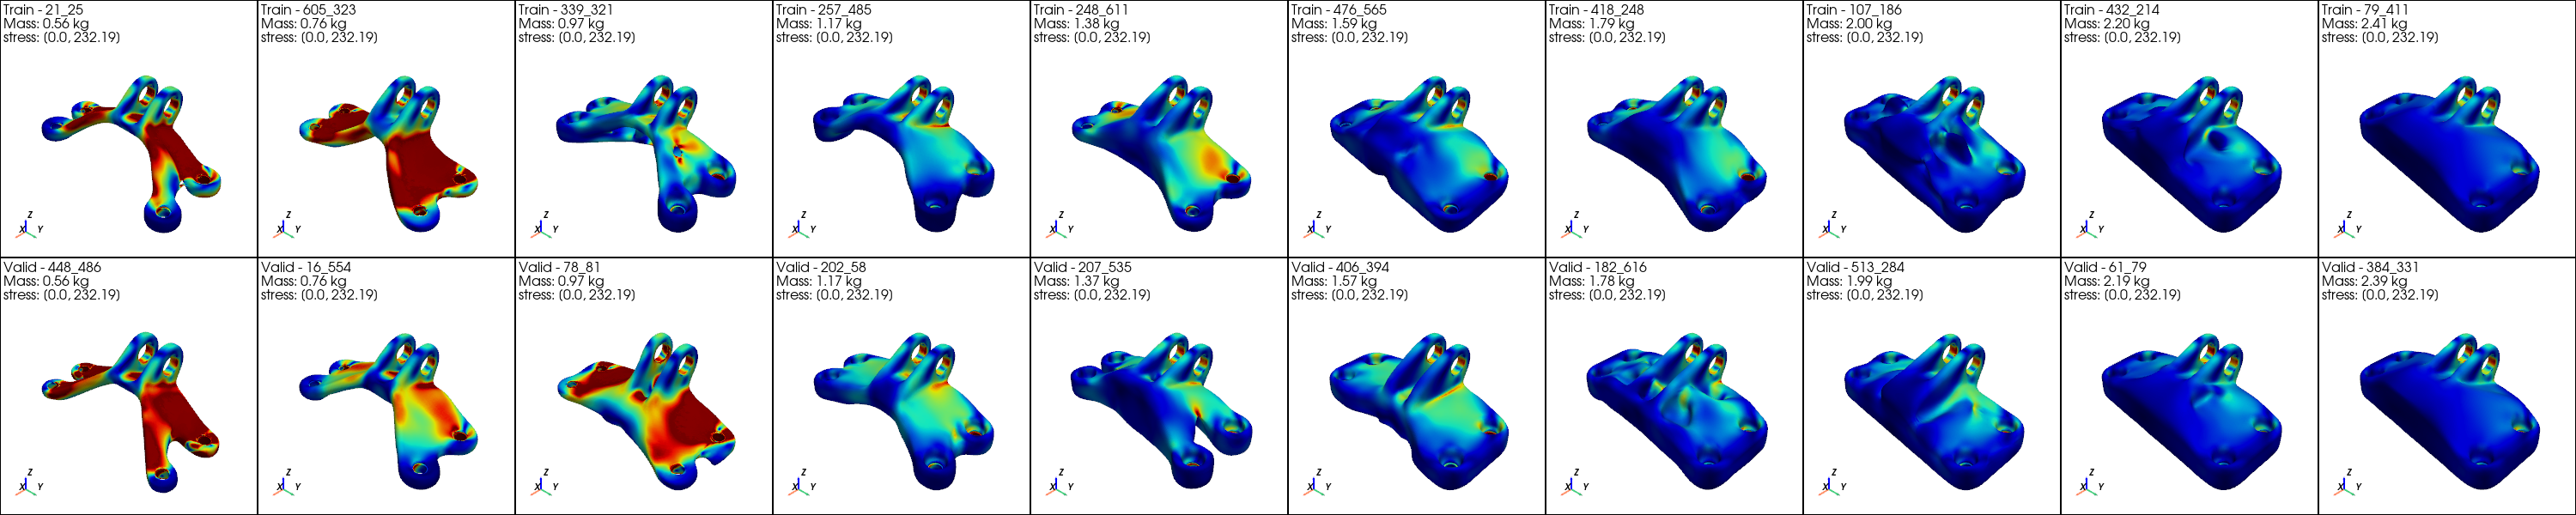

Visualization saved to '../figures/stress_vtk_ver_stress.png'.
Colorbar saved as '../figures/colorbar_ver_stress.png'.


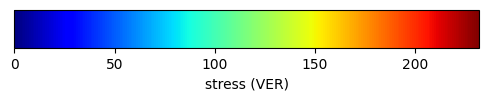

Visualizing UX in HOR Direction...
HOR - UX - Global Min: -0.9389619827270508, Global Max: 0.07806199789047241


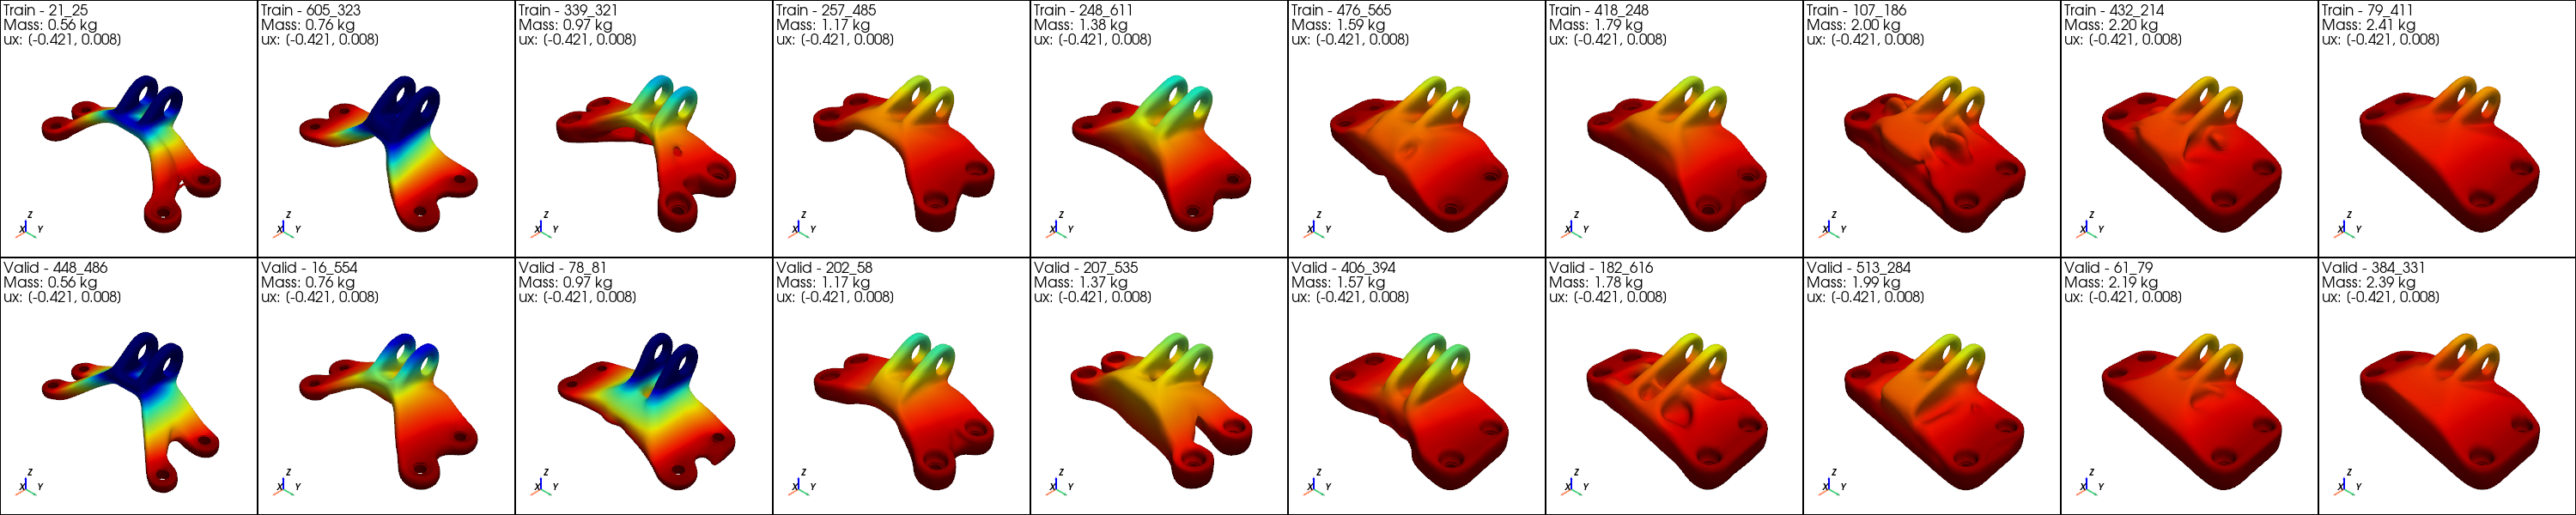

Visualization saved to '../figures/stress_vtk_hor_ux.png'.
Colorbar saved as '../figures/colorbar_hor_ux.png'.


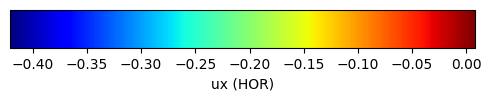

Visualizing UY in HOR Direction...
HOR - UY - Global Min: -0.0778840035200119, Global Max: 0.08320099860429764


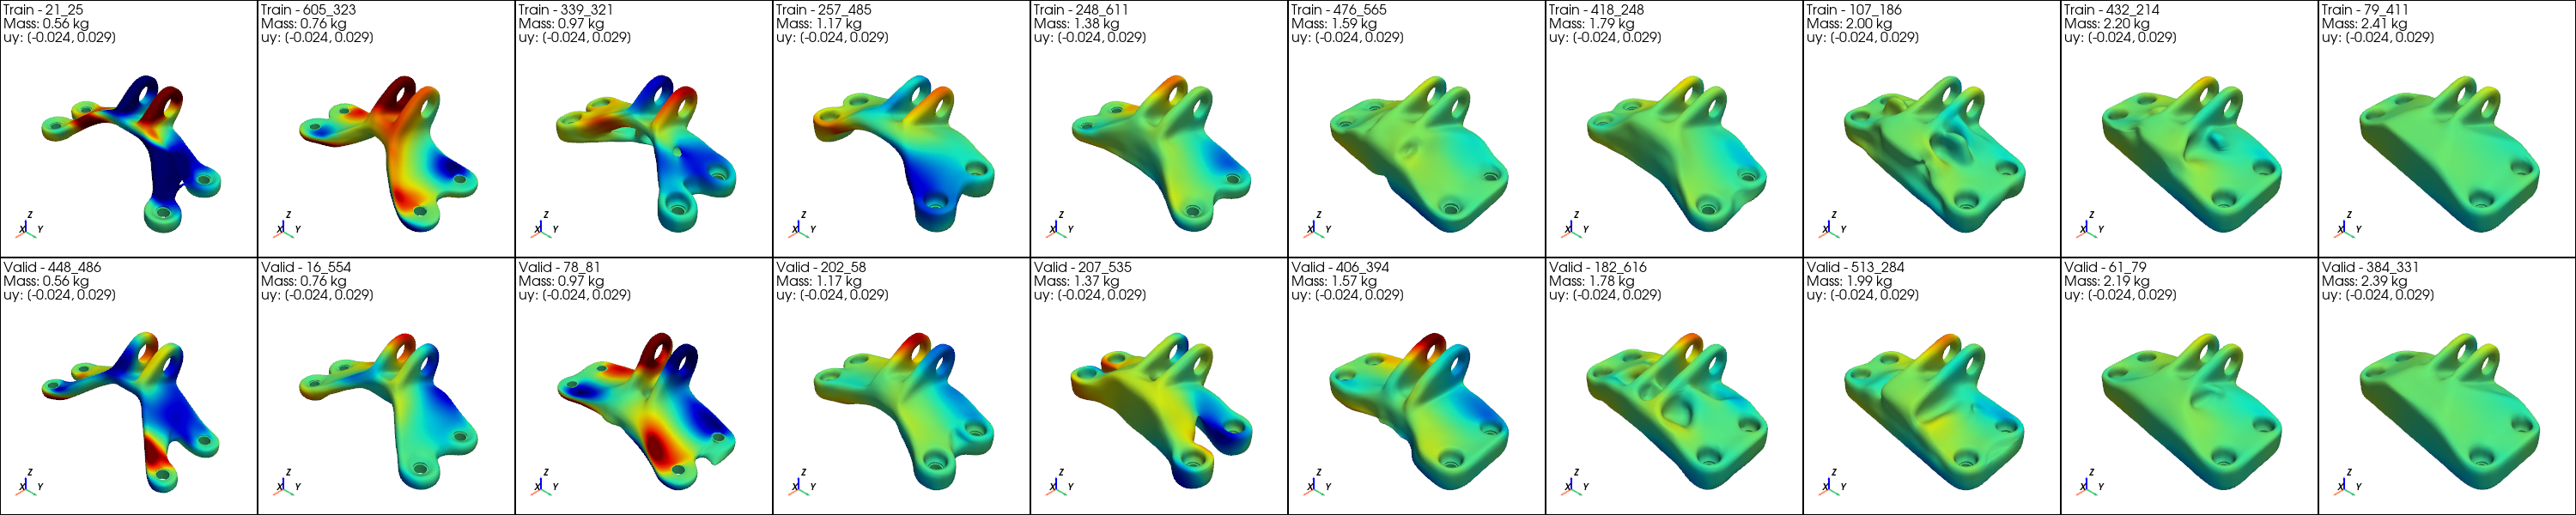

Visualization saved to '../figures/stress_vtk_hor_uy.png'.
Colorbar saved as '../figures/colorbar_hor_uy.png'.


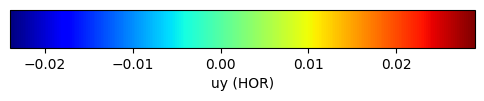

Visualizing UZ in HOR Direction...
HOR - UZ - Global Min: -0.9122679829597473, Global Max: 0.33464300632476807


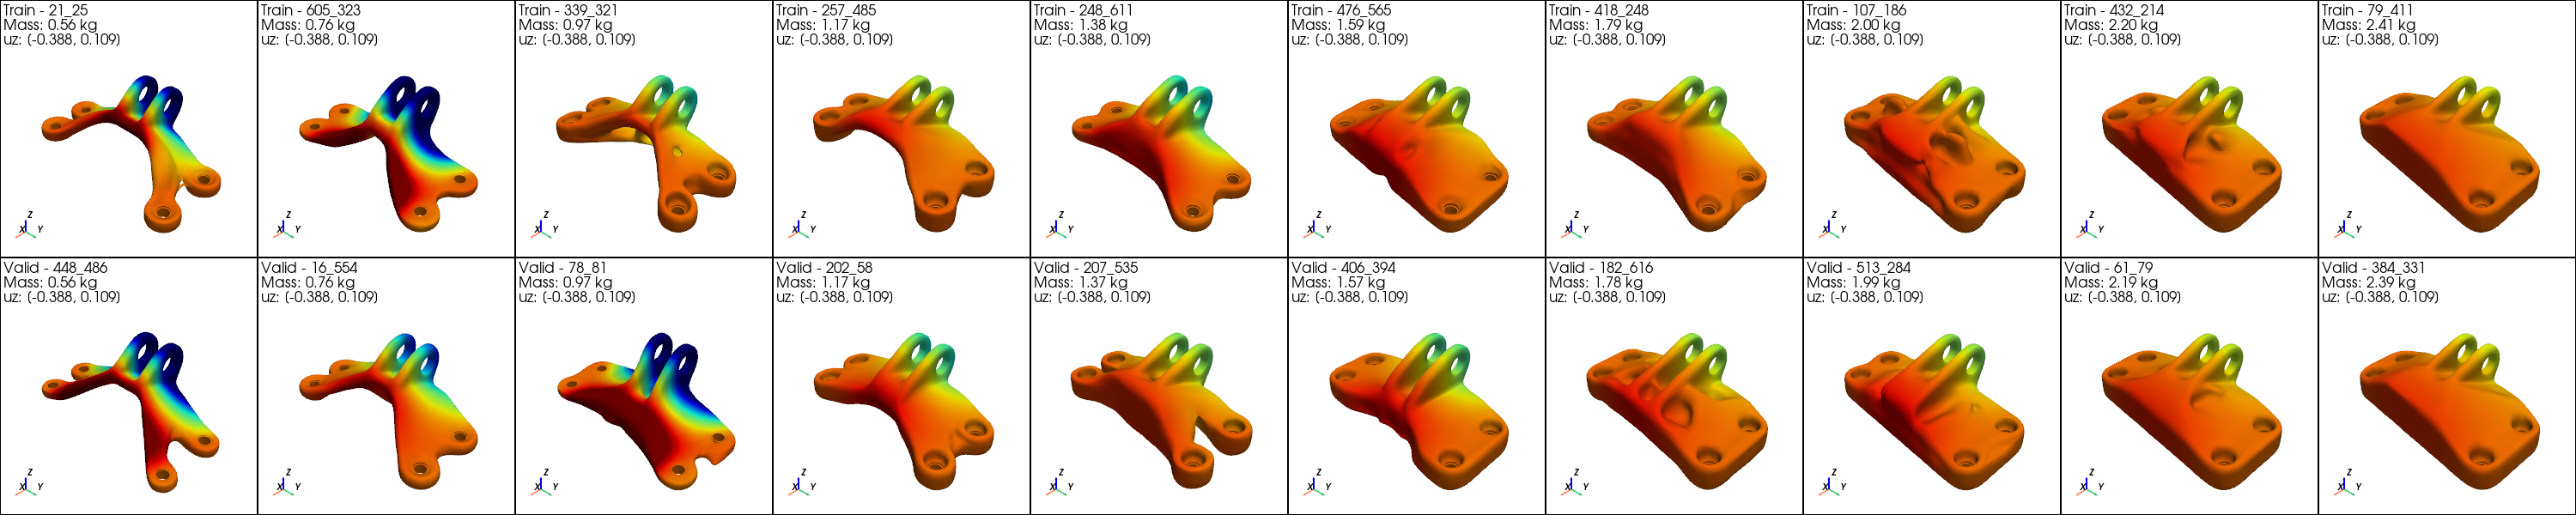

Visualization saved to '../figures/stress_vtk_hor_uz.png'.
Colorbar saved as '../figures/colorbar_hor_uz.png'.


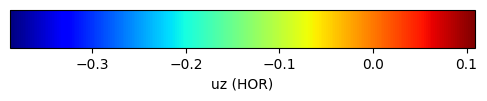

Visualizing STRESS in HOR Direction...
HOR - STRESS - Global Min: 0.049563001841306686, Global Max: 488.3620300292969


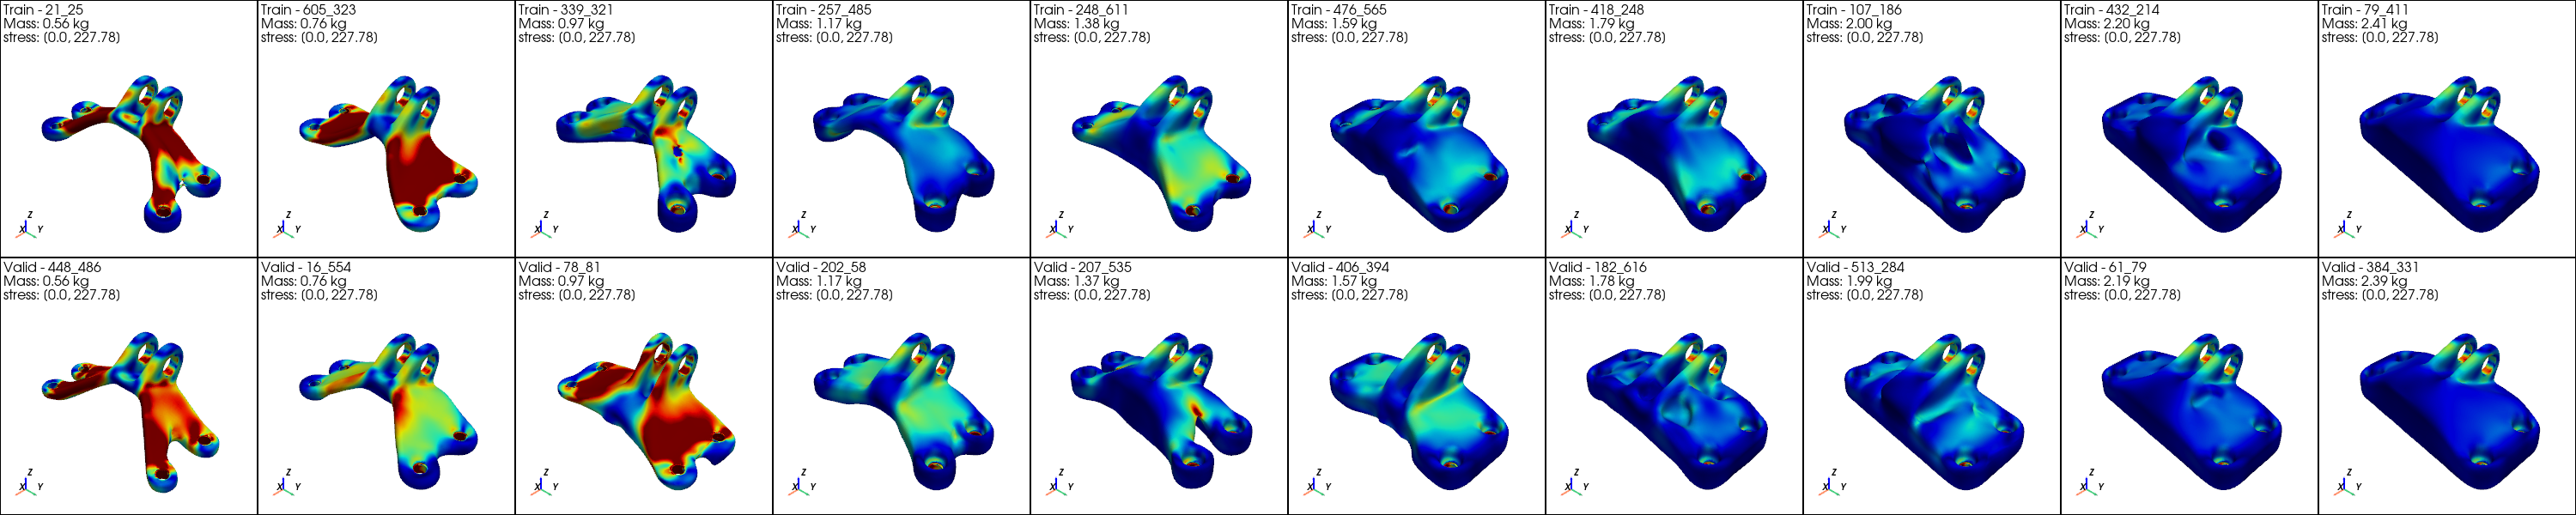

Visualization saved to '../figures/stress_vtk_hor_stress.png'.
Colorbar saved as '../figures/colorbar_hor_stress.png'.


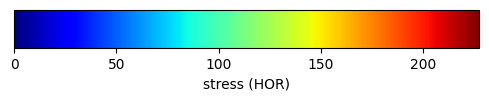

Visualizing UX in DIA Direction...
DIA - UX - Global Min: -0.2873539924621582, Global Max: 0.0578170008957386


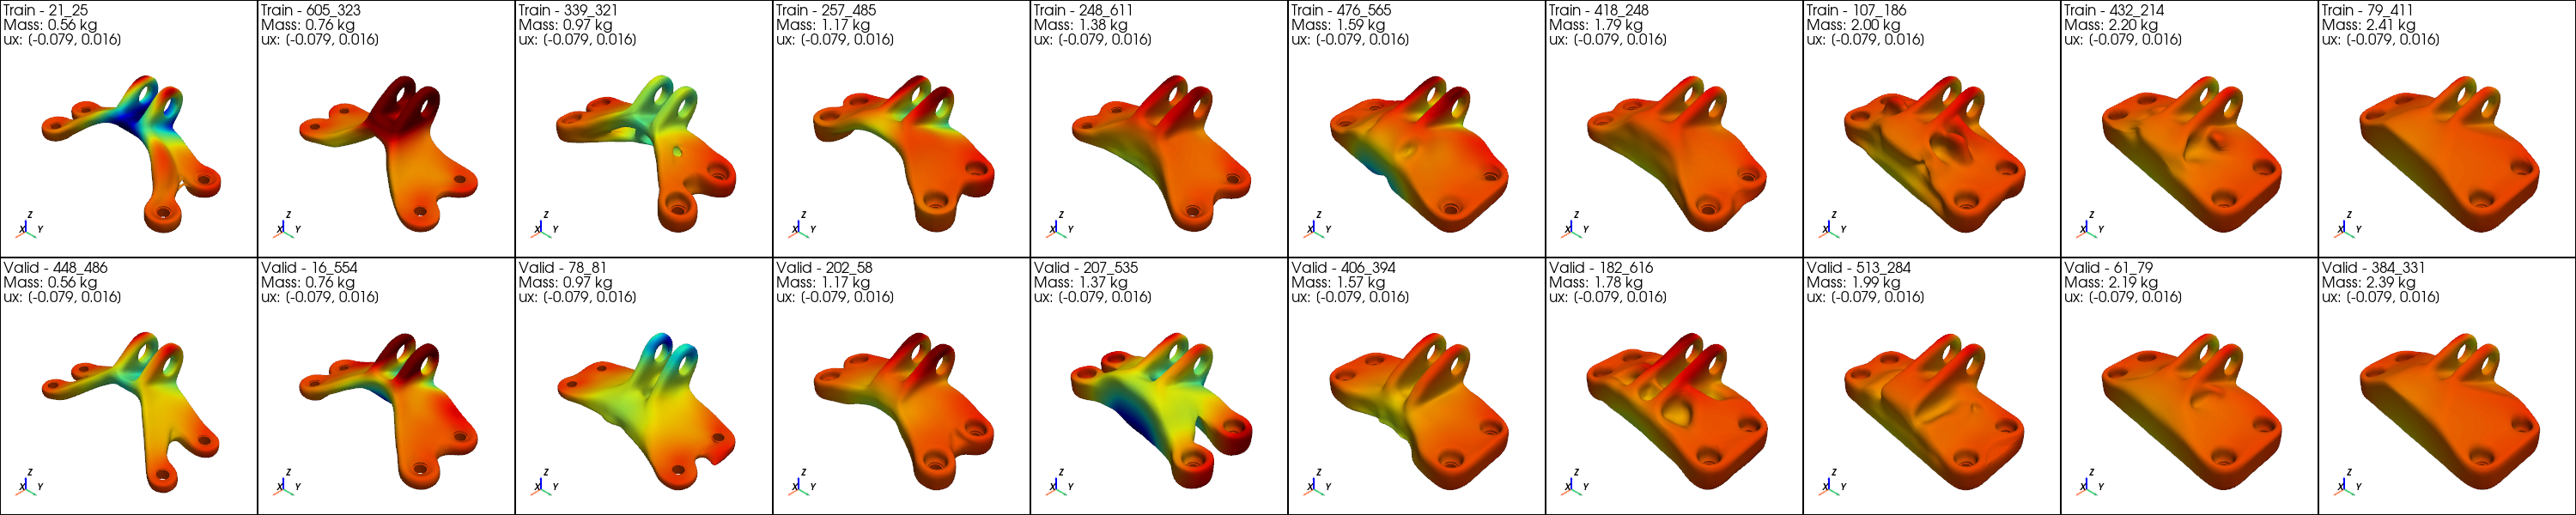

Visualization saved to '../figures/stress_vtk_dia_ux.png'.
Colorbar saved as '../figures/colorbar_dia_ux.png'.


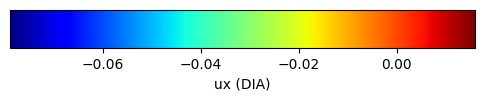

Visualizing UY in DIA Direction...
DIA - UY - Global Min: -0.21986399590969086, Global Max: 0.19441699981689453


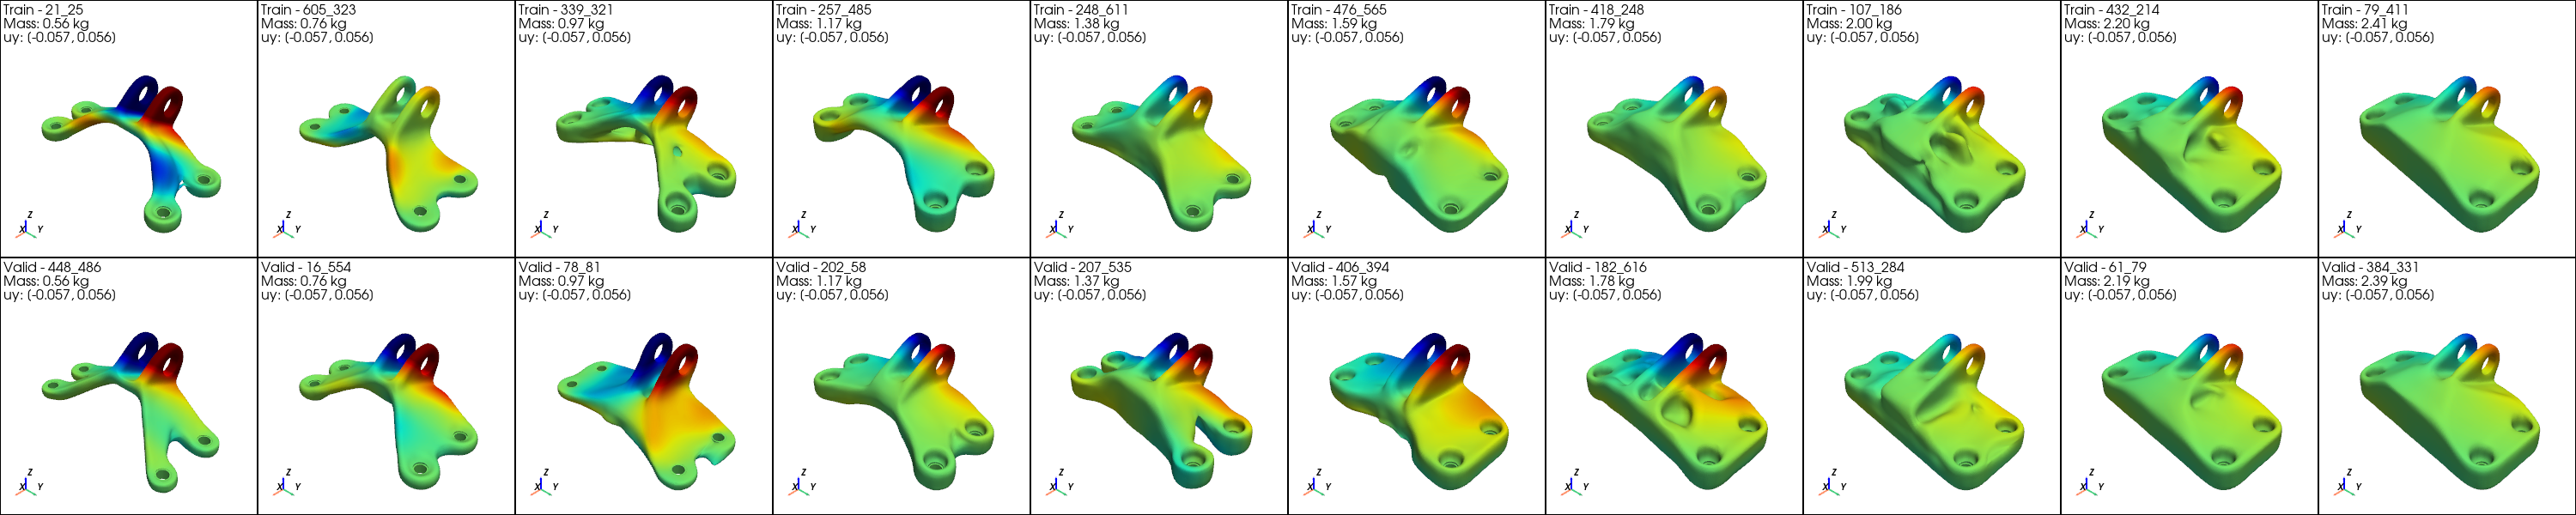

Visualization saved to '../figures/stress_vtk_dia_uy.png'.
Colorbar saved as '../figures/colorbar_dia_uy.png'.


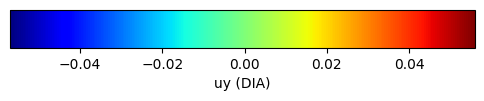

Visualizing UZ in DIA Direction...
DIA - UZ - Global Min: -0.017199000343680382, Global Max: 0.38614800572395325


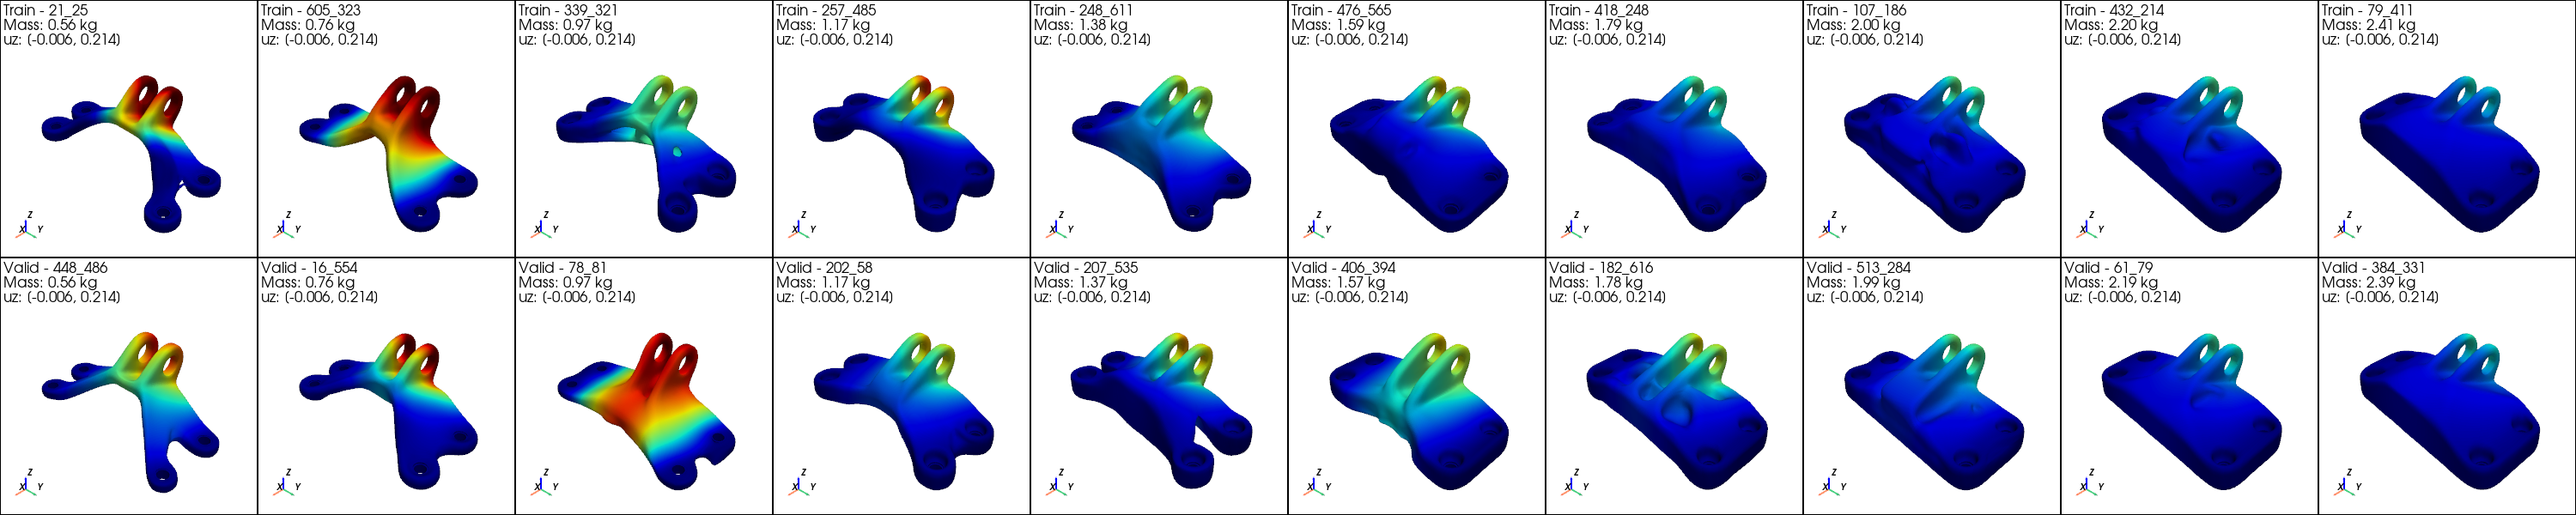

Visualization saved to '../figures/stress_vtk_dia_uz.png'.
Colorbar saved as '../figures/colorbar_dia_uz.png'.


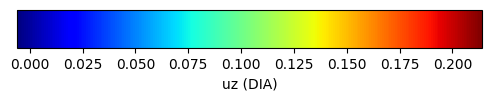

Visualizing STRESS in DIA Direction...
DIA - STRESS - Global Min: 0.0530100017786026, Global Max: 492.6481018066406


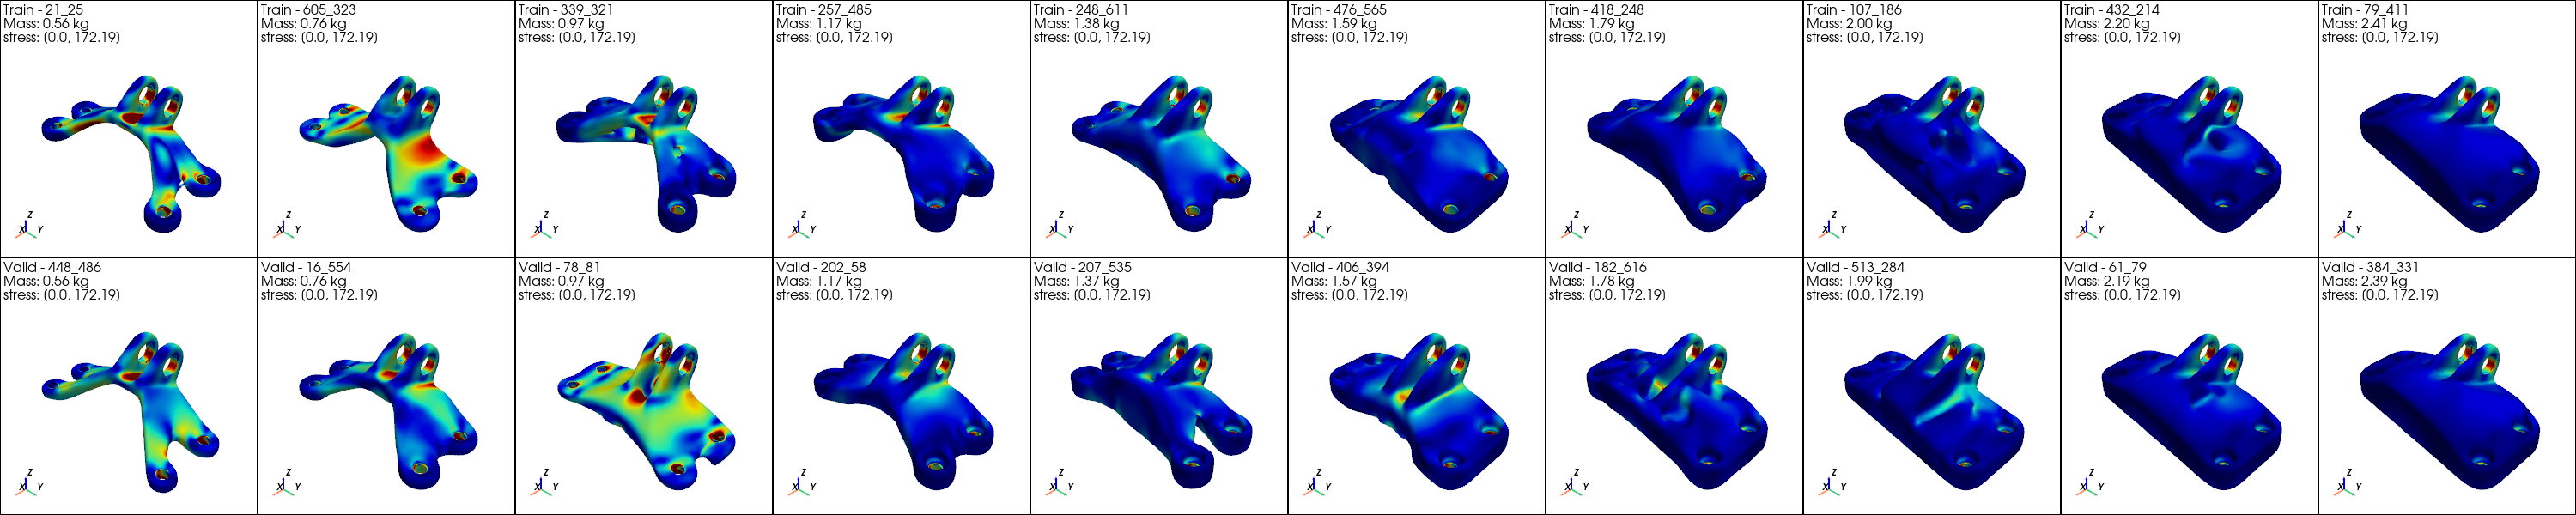

Visualization saved to '../figures/stress_vtk_dia_stress.png'.
Colorbar saved as '../figures/colorbar_dia_stress.png'.


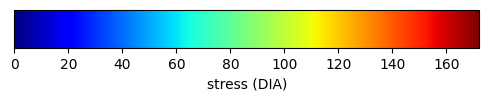

In [2]:
import numpy as np
import pyvista as pv
import os
import matplotlib.pyplot as plt
import matplotlib.colorbar as cbar
import vtk
from IPython.display import display, Image
import matplotlib.image as mpimg

# Configure PyVista and VTK
pv.global_theme.jupyter_backend = 'static'
vtk.vtkObject.GlobalWarningDisplayOff()

# Number of samples
number_of_samples = 3000

# File paths
split_file_path = f'../data/npy/one_{number_of_samples}_sampled10_split_random_train_valid.npz'
vtk_base_path = '../data/VolumeMesh/'
stress_file_path = '../data/npy/targets.npz'
mass_file_path = f'../data/npy/one_{number_of_samples}_mass.npz'
output_file_path = '../data/sampled/Rpt0_N5000.npz'  # Ensure this path is correct
base_figures = '../figures/'
os.makedirs(base_figures, exist_ok=True)

# Load train/valid split data
split_data = np.load(split_file_path, allow_pickle=True)
train_data = split_data['train'].item()
valid_data = split_data['valid'].item()

# Load mass data
mass_data = np.load(mass_file_path, allow_pickle=True)
mass_data = {key: mass_data[key].item() for key in mass_data.files}

# Load stress data
stress_data = np.load(stress_file_path, allow_pickle=True)

# Load output data (used for referencing file names)
output_data = np.load(output_file_path, allow_pickle=True)
output_pos = output_data['a']      # Coordinates (xyzdm)
output_stress = output_data['b'][:, :, 3]  # Stress data
file_names = output_data['c']      # List of file names

# Mapping component indices to names
component_names = {0: 'ux', 1: 'uy', 2: 'uz', 3: 'stress'}

def get_clip_values(direction):
    """
    Returns predefined min/max clipping values for each component based on the direction.
    """
    if direction == 'ver':
        return {
            0: (-0.068, 0.473),
            1: (-0.093, 0.073),
            2: (-0.003, 0.824),
            3: (0., 232.19),
        }
    elif direction == 'hor':
        return {
            0: (-0.421, 0.008),
            1: (-0.024, 0.029),
            2: (-0.388, 0.109),
            3: (0., 227.78),
        }
    elif direction == 'dia':
        return {
            0: (-0.079, 0.016),
            1: (-0.057, 0.056),
            2: (-0.006, 0.214),
            3: (0., 172.19),
        }
    else:
        raise ValueError(f"Unknown direction: {direction}")

def visualize_vtk_with_stress(keys, direction, component, base_figures, title, file_names, num_samples=5, opacity=1.0):
    """
    Visualizes VTK meshes for both training and validation items, applying stress (or other component) data.
    The function displays two rows: top for train samples, bottom for valid samples.
    """
    per_subplot_pixel = 300
    num_rows = 2
    num_cols = num_samples
    window_width = num_cols * per_subplot_pixel
    window_height = num_rows * per_subplot_pixel

    plotter = pv.Plotter(shape=(num_rows, num_cols), window_size=(window_width, window_height))

    def find_key_index(full_key):
        indices = np.where(np.array(file_names) == full_key)[0]
        if len(indices) == 0:
            print(f"Warning: '{full_key}' not found in file_names.")
            return None
        return indices[0]

    clip_dict = get_clip_values(direction)
    if component not in clip_dict:
        print(f"Component {component} not defined for direction '{direction}'.")
        return

    a_min, a_max = clip_dict[component]
    scalar_label = component_names.get(component, f'component_{component}')

    # Split keys for train and valid sets
    train_keys = keys[:num_samples]
    valid_keys = keys[num_samples:num_samples*2]

    # Function to process and plot a single sample
    def plot_sample(key, row_idx, prefix):
        full_key = f'{direction}_{key}'
        key_index = find_key_index(full_key)
        if key_index is None:
            return

        vtk_file = os.path.join(vtk_base_path, f"{key}.vtk")
        if not os.path.exists(vtk_file):
            print(f"VTK file not found for {key}")
            return

        mesh = pv.read(vtk_file)
        if len(mesh.points) >= 5:
            mesh.points = mesh.points[:-5, :]
        else:
            print(f"Mesh {key} has fewer than 5 points. Skipping point removal.")

        stress_key = f"{direction}_{key}"
        if stress_key in stress_data:
            stress_values = stress_data[stress_key][:, component]
            if len(mesh.points) >= 5:
                stress_values = np.append(stress_values, [0] * 5)
            stress_values = np.clip(stress_values, a_min=a_min, a_max=a_max)
            mesh[scalar_label] = stress_values
            mass_value = mass_data.get(key, 0.0)

            # Add mesh to the plotter
            col_idx = train_keys.index(key) if prefix == 'Train' else valid_keys.index(key)
            plotter.subplot(row_idx, col_idx)
            plotter.add_mesh(
                mesh,
                scalars=scalar_label,
                cmap='jet',
                clim=[a_min, a_max],
                point_size=10,
                render_points_as_spheres=True,
                show_scalar_bar=False,
                opacity=opacity
            )
            # Add text annotation
            plotter.add_text(
                f'{prefix} - {key}\nMass: {mass_value:.2f} kg\n{scalar_label}: [{a_min}, {a_max}]',
                font_size=10,
                position='upper_left',
                shadow=True
            )
            plotter.add_axes()
        else:
            print(f"Stress data not found for {stress_key}")

    # Plot train samples (row 0)
    for key in train_keys:
        plot_sample(key, 0, 'Train')

    # Plot valid samples (row 1)
    for key in valid_keys:
        plot_sample(key, 1, 'Valid')

    plotter.show()
    save_path = os.path.join(base_figures, f'stress_{title}_{component_names.get(component, component)}.png')
    plotter.render()
    plotter.screenshot(save_path)
    plotter.close()
    print(f"Visualization saved to '{save_path}'.")

def calculate_global_min_max(train_keys, valid_keys, direction, component):
    """
    Finds the global minimum and maximum stress values across the selected training and validation keys.
    """
    global_min_stress = np.inf
    global_max_stress = -np.inf

    for key in train_keys + valid_keys:
        stress_key = f"{direction}_{key}"
        if stress_key in stress_data:
            stress_values = stress_data[stress_key][:, component]
            current_min = np.min(stress_values)
            current_max = np.max(stress_values)
            if current_min < global_min_stress:
                global_min_stress = current_min
            if current_max > global_max_stress:
                global_max_stress = current_max

    return global_min_stress, global_max_stress

def visualize_global_colorbar(a_min, a_max, direction, component, base_figures):
    """
    Generates and saves a standalone colorbar image for reference.
    """
    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)

    cmap = plt.get_cmap('jet')
    norm = plt.Normalize(vmin=a_min, vmax=a_max)

    cb1 = cbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')
    scalar_label = component_names.get(component, f'component_{component}')
    cb1.set_label(f'{scalar_label} ({direction.upper()})')

    colorbar_path = os.path.join(base_figures, f'colorbar_{direction}_{scalar_label}.png')
    plt.savefig(colorbar_path, bbox_inches='tight')
    plt.close(fig)
    print(f"Colorbar saved as '{colorbar_path}'.")
    display(Image(filename=colorbar_path))

def visualize_all_directions_components(train_data, valid_data, base_figures, num_samples=10):
    """
    Iterates over all directions and components, creates visualizations for training/validation items,
    and saves corresponding stress colorbars.
    """
    directions = ['ver', 'hor', 'dia']
    components = [0, 1, 2, 3]

    for direction in directions:
        for component in components:
            print(f"Visualizing {component_names.get(component, component).upper()} in {direction.upper()} Direction...")
            train_keys = list(train_data.keys())[:num_samples]
            valid_keys = list(valid_data.keys())[:num_samples]
            combined_keys = train_keys + valid_keys

            global_min_stress, global_max_stress = calculate_global_min_max(train_keys, valid_keys, direction, component)
            print(f"{direction.upper()} - {component_names.get(component, component).upper()} - Global Min: {global_min_stress}, Global Max: {global_max_stress}")

            visualize_vtk_with_stress(
                combined_keys,
                direction,
                component,
                base_figures,
                f"vtk_{direction}",
                file_names,
                num_samples=num_samples,
                opacity=1.0
            )

            clip_dict = get_clip_values(direction)
            if component in clip_dict:
                a_min, a_max = clip_dict[component]
                visualize_global_colorbar(a_min, a_max, direction, component, base_figures)
            else:
                print(f"No clipping values defined for component {component} in direction '{direction}'.")

# Execute visualization for all directions and components
visualize_all_directions_components(train_data, valid_data, base_figures, num_samples=10)
